# Data Wrangling project - Prathmesh Singh CHOUHAN, Siddharth TAURANI and Maharshi PATEL

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter
%matplotlib inline
sns.set_theme(style="whitegrid")

# Display options
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

## Part I: Data Cleaning & Prep

### LOAD DATA & INITIAL INSPECTION

In [3]:
# Change path if needed
df = pd.read_csv("vgsales.csv")

print("Initial shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nInfo:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())

# Check missing values
print("\nMissing values per column:")
print(df.isna().sum())

Initial shape: (16598, 11)

Columns:
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

First 5 rows:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



Missing values per column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### 1.1 HANDLE MISSING VALUES & DATA TYPES

In [4]:
df_clean = df.copy()
df_clean["Year"] = df_clean["Year"].astype("Int64")

print("\nAfter converting Year dtype:")
print(df_clean["Year"].dtype)


After converting Year dtype:
Int64


In [5]:
sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
df_clean["Total_Regional_Sales"] = df_clean[sales_cols[:-1]].sum(axis=1)
zero_sales = (df_clean["Global_Sales"] == 0) & (df_clean["Total_Regional_Sales"] == 0)
print("\nRows with zero global + zero regional sales:", zero_sales.sum())


Rows with zero global + zero regional sales: 0


### CHECK & REMOVE DUPLICATES

In [6]:
dup_count = df_clean.duplicated().sum()
print("\nNumber of fully duplicated rows:", dup_count)

df_clean = df_clean.drop_duplicates()
print("Shape after dropping duplicates:", df_clean.shape)


Number of fully duplicated rows: 0
Shape after dropping duplicates: (16598, 12)


### 1.3 "BEFORE / AFTER" SUMMARY FOR EVALUATION GRID

In [7]:
print("\n=== BEFORE CLEANING ===")
print("Shape:", df.shape)
print("Missing values:\n", df.isna().sum())

print("\n=== AFTER CLEANING ===")
print("Shape:", df_clean.shape)
print("Missing values:\n", df_clean.isna().sum())


=== BEFORE CLEANING ===
Shape: (16598, 11)
Missing values:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

=== AFTER CLEANING ===
Shape: (16598, 12)
Missing values:
 Rank                      0
Name                      0
Platform                  0
Year                    271
Genre                     0
Publisher                58
NA_Sales                  0
EU_Sales                  0
JP_Sales                  0
Other_Sales               0
Global_Sales              0
Total_Regional_Sales      0
dtype: int64


In [8]:
print("\n=== BEFORE CLEANING ===")
print("Shape:", df.shape)
print("Missing values:\n", df.isna().sum())

print("\n=== AFTER CLEANING ===")
print("Shape:", df_clean.shape)
print("Missing values:\n", df_clean.isna().sum())


=== BEFORE CLEANING ===
Shape: (16598, 11)
Missing values:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

=== AFTER CLEANING ===
Shape: (16598, 12)
Missing values:
 Rank                      0
Name                      0
Platform                  0
Year                    271
Genre                     0
Publisher                58
NA_Sales                  0
EU_Sales                  0
JP_Sales                  0
Other_Sales               0
Global_Sales              0
Total_Regional_Sales      0
dtype: int64


## Part II: EDA

### 2.1 DESCRIPTIVE STATISTICS

In [10]:
print("\n=== DESCRIPTIVE STATISTICS (Numerical Columns) ===")
display(df_clean[sales_cols].describe())

top10_games = df_clean.sort_values("Global_Sales", ascending=False).head(10)
print("\n=== Top 10 Best-Selling Games Globally ===")
display(top10_games[["Rank", "Name", "Platform", "Year", "Genre", "Publisher", "Global_Sales"]])


=== DESCRIPTIVE STATISTICS (Numerical Columns) ===


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000



=== Top 10 Best-Selling Games Globally ===


,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


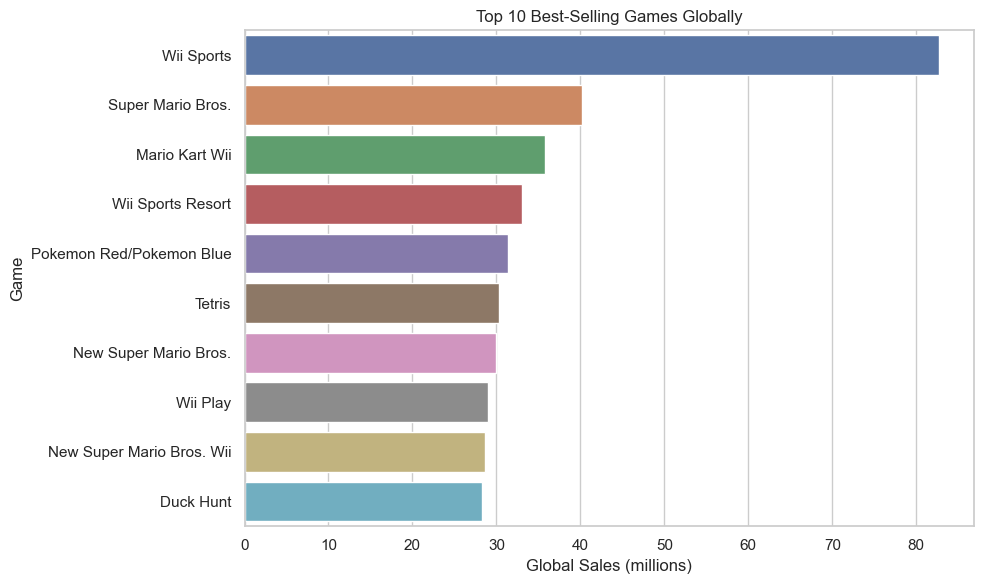

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_games,
    x="Global_Sales",
    y="Name"
)
plt.title("Top 10 Best-Selling Games Globally")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Game")
plt.tight_layout()
plt.show()

### 2.2 TRENDS OVER TIME

In [12]:
df_year = df_clean.dropna(subset=["Year"]).copy()
df_year["Year"] = df_year["Year"].astype(int)

c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


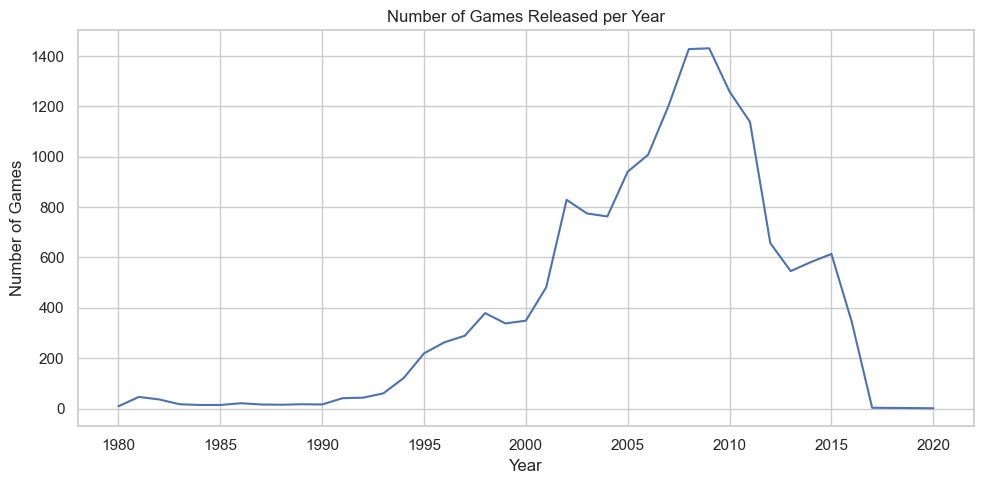

In [13]:
games_per_year = df_year.groupby("Year")["Name"].count().reset_index(name="Num_Games")

plt.figure(figsize=(10, 5))
sns.lineplot(data=games_per_year, x="Year", y="Num_Games")
plt.title("Number of Games Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


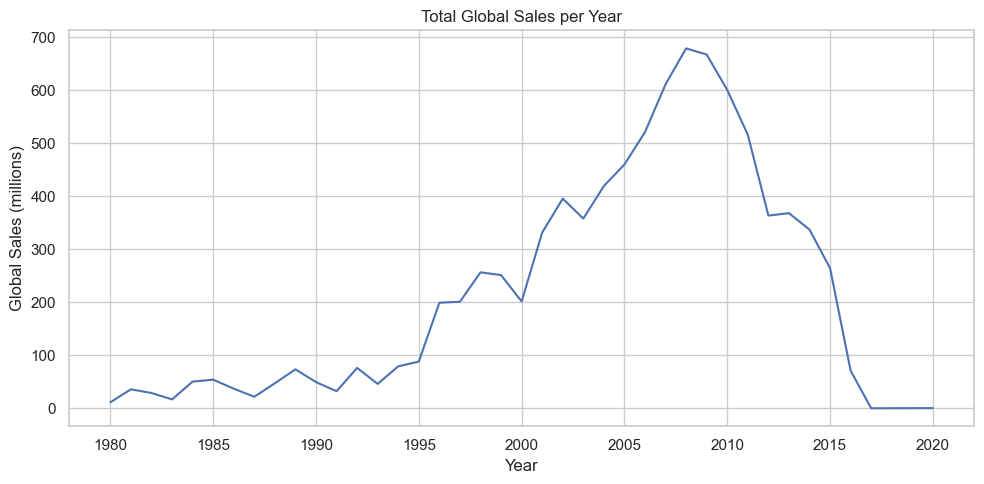

In [14]:
sales_per_year = df_year.groupby("Year")["Global_Sales"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_per_year, x="Year", y="Global_Sales")
plt.title("Total Global Sales per Year")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

### 2.3 GENRE ANALYSIS

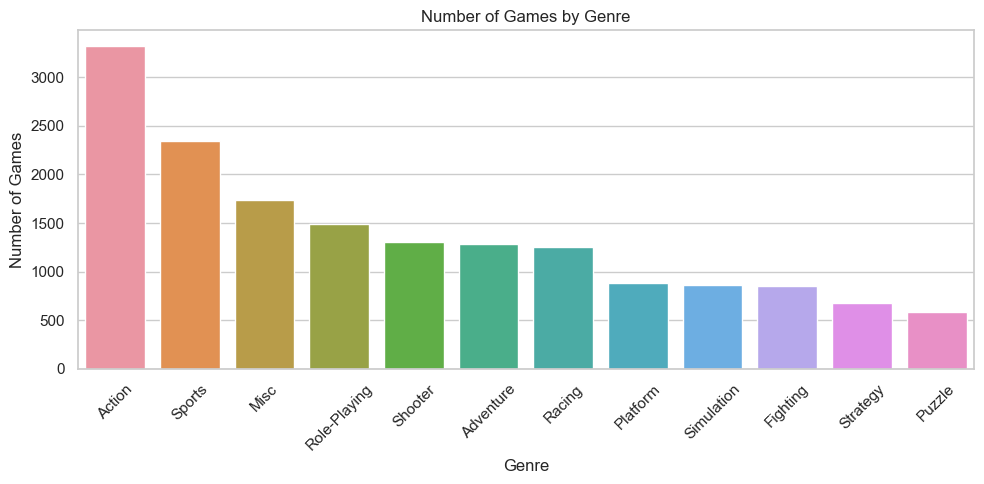

In [15]:
genre_counts = df_clean["Genre"].value_counts().reset_index()
genre_counts.columns = ["Genre", "Num_Games"]

plt.figure(figsize=(10, 5))
sns.barplot(data=genre_counts, x="Genre", y="Num_Games")
plt.title("Number of Games by Genre")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

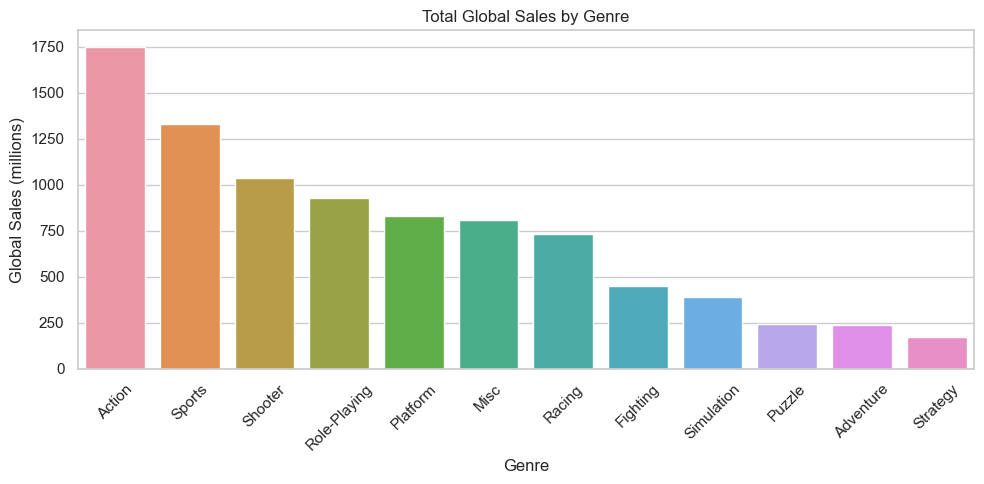

In [16]:
genre_sales = df_clean.groupby("Genre")["Global_Sales"].sum().reset_index().sort_values("Global_Sales", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=genre_sales, x="Genre", y="Global_Sales")
plt.title("Total Global Sales by Genre")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

In [17]:
print("\n=== Genre Counts ===")
display(genre_counts)

print("\n=== Genre Global Sales ===")
display(genre_sales)


=== Genre Counts ===


,Genre,Num_Games
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848



=== Genre Global Sales ===


,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


### 2.4 PLATFORM ANALYSIS

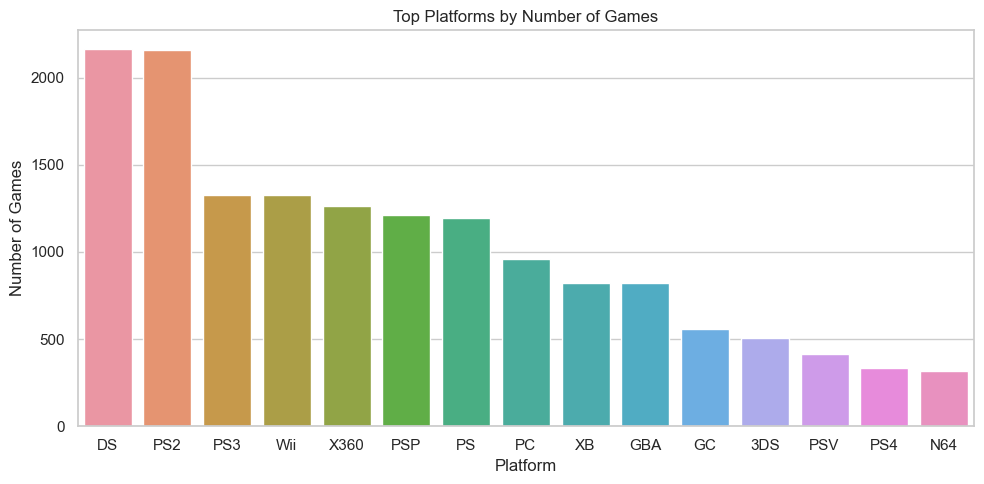

In [18]:
platform_counts = df_clean["Platform"].value_counts().reset_index()
platform_counts.columns = ["Platform", "Num_Games"]

plt.figure(figsize=(10, 5))
sns.barplot(data=platform_counts.head(15), x="Platform", y="Num_Games")
plt.title("Top Platforms by Number of Games")
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

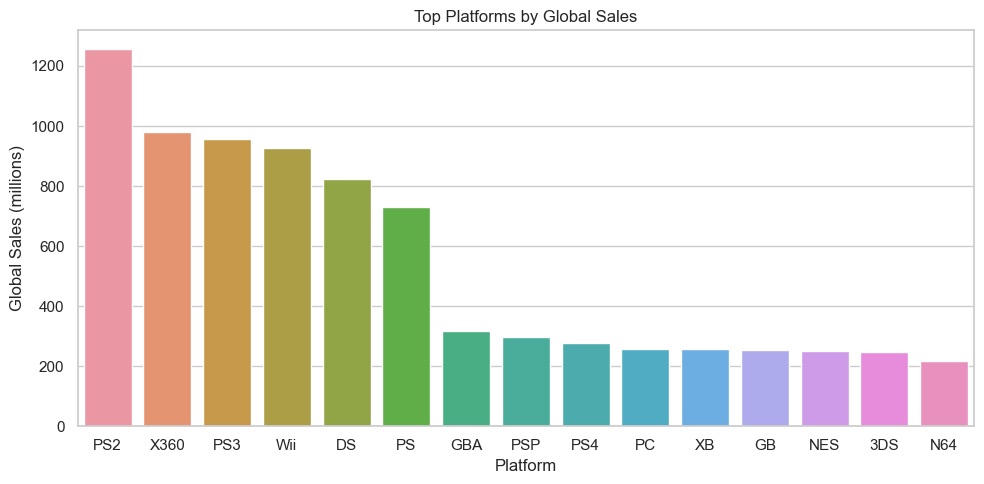

In [19]:
platform_sales = df_clean.groupby("Platform")["Global_Sales"].sum().reset_index().sort_values("Global_Sales", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=platform_sales.head(15), x="Platform", y="Global_Sales")
plt.title("Top Platforms by Global Sales")
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

In [20]:
print("\n=== Platform Counts ===")
display(platform_counts.head(15))

print("\n=== Platform Global Sales ===")
display(platform_sales.head(15))


=== Platform Counts ===


,Platform,Num_Games
0,DS,2163
1,PS2,2161
2,PS3,1329
3,Wii,1325
4,X360,1265
5,PSP,1213
6,PS,1196
7,PC,960
8,XB,824
9,GBA,822



=== Platform Global Sales ===


,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


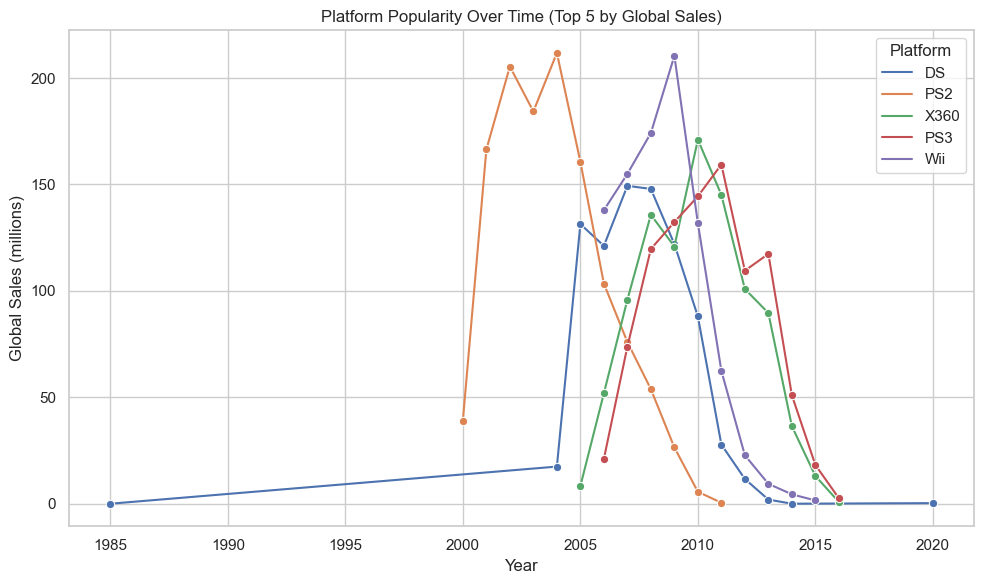

In [21]:
top_platforms = platform_sales.head(5)["Platform"]
df_top_plat = df_year[df_year["Platform"].isin(top_platforms)]

year_platform_sales = (
    df_top_plat
    .groupby(["Year", "Platform"])["Global_Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=year_platform_sales, x="Year", y="Global_Sales", hue="Platform", marker="o")
plt.title("Platform Popularity Over Time (Top 5 by Global Sales)")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

### 2.5 REGIONAL ANALYSIS


=== Total Sales by Region (millions) ===
NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64


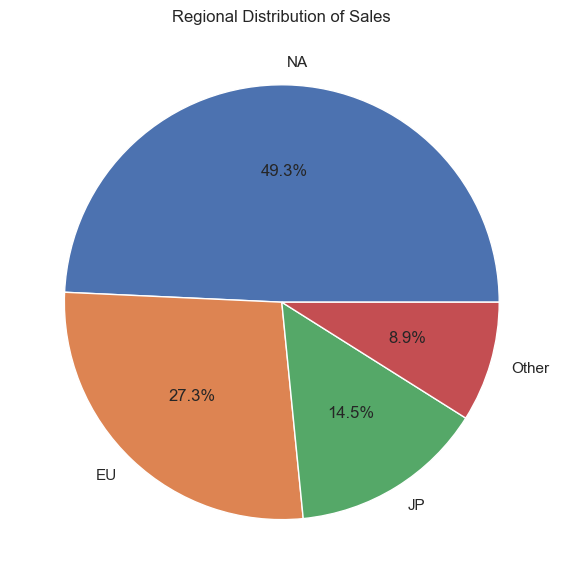

In [22]:
region_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

region_totals = df_clean[region_cols].sum()
print("\n=== Total Sales by Region (millions) ===")
print(region_totals)

plt.figure(figsize=(6, 6))
plt.pie(region_totals.values, labels=["NA", "EU", "JP", "Other"], autopct="%1.1f%%")
plt.title("Regional Distribution of Sales")
plt.tight_layout()
plt.show()

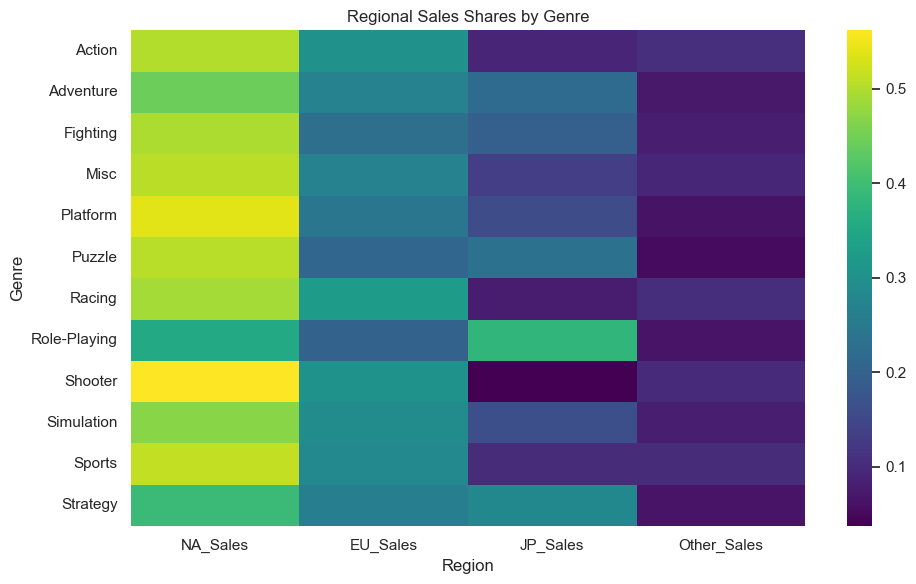

In [23]:
genre_region_sales = df_clean.groupby("Genre")[region_cols].sum()

genre_region_shares = genre_region_sales.div(genre_region_sales.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(genre_region_shares, annot=False, cmap="viridis")
plt.title("Regional Sales Shares by Genre")
plt.xlabel("Region")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [24]:
print("\n=== Genre x Region Sales (absolute) ===")
display(genre_region_sales.head())

print("\n=== Genre x Region Sales Shares ===")
display(genre_region_shares.head())


=== Genre x Region Sales (absolute) ===


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59



=== Genre x Region Sales Shares ===


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.501571,0.299973,0.091392,0.107064
Adventure,0.443030,0.268540,0.218039,0.070391
Fighting,0.498040,0.225687,0.194569,0.081704
Misc,0.506907,0.266873,0.133152,0.093068
Platform,0.537940,0.242624,0.157357,0.062079


### 2.6 PUBLISHER INSIGHTS

In [25]:
publisher_sales = (
    df_clean
    .groupby("Publisher")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values("Global_Sales", ascending=False)
)

top10_publishers = publisher_sales.head(10)
print("\n=== Top 10 Publishers by Global Sales ===")
display(top10_publishers)


=== Top 10 Publishers by Global Sales ===


,Publisher,Global_Sales
359,Nintendo,1786.56
138,Electronic Arts,1110.32
21,Activision,727.46
456,Sony Computer Entertainment,607.50
525,Ubisoft,474.72
494,Take-Two Interactive,399.54
488,THQ,340.77
275,Konami Digital Entertainment,283.64
446,Sega,272.99
347,Namco Bandai Games,254.09


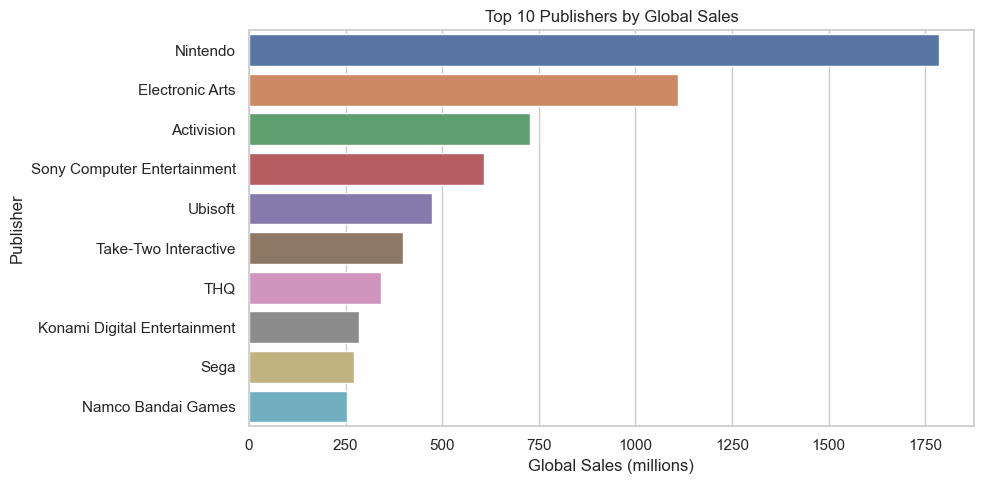

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top10_publishers, x="Global_Sales", y="Publisher")
plt.title("Top 10 Publishers by Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

### 2.7 MARKET DOMINANCE ANALYSIS

### 2.8 REGIONAL PREFERENCE DIVERGENCE